<h1>The Story Behind Hearing Health Survey Data: Understanding Barriers & App Features</h1>

<h4>1. Reading Data and Cleaning Column Names

The first step is always to bring the data in and get to know it. We have a CSV file with results from a hearing health survey.
We load it using pandas and rename columns to simpler, cleaner names to make our work easier later on — no long awkward names or spaces to slow us down.</h4>

In [4]:
# Load survey data
import pandas as pd
df = pd.read_csv("Hearing well-being Survey Report.csv", encoding='utf-8')

In [5]:
# Simplify column names for easier handling
df.rename(columns={
    'Perceived_Hearing_Meaning': 'Meaning',
    'Hearing_FOMO': 'FOMO',
    'Hearing_Test_Barrier': 'Barrier',
    'Missed_Important_Sounds': 'Missed',
    'Left_Out_Due_To_Hearing': 'LeftOut',
    'Daily_Headphone_Use': 'Headphones',
    'Belief_Early_Hearing_Care': 'CareScore',
    'Last_Hearing_Test_Method': 'TestMethod',
    'Interest_in_Hearing_App': 'AppInterest',
    'Desired_App_Features': 'AppFeatures',
    'Awareness_on_hearing_and_Willingness_to_invest': 'Awareness',
    'Paid_App_Test_Interest': 'PayInterest',
    'Age_group': 'AgeGroup',
    'Ear_Discomfort_After_Use': 'Discomfort'
}, inplace=True)

In [6]:
# Clean column names further: strip spaces and replace dashes/space with underscores
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("-", "_")

In [7]:
df

,Meaning,FOMO,Barrier,Missed,LeftOut,Headphones,CareScore,TestMethod,AppInterest,AppFeatures,Awareness,PayInterest,AgeGroup,Discomfort
0,"Staying independent and alert, Enjoying music,...",Sometimes,Cost,"Yes, in family conversations","Yes, often",My parent(s),5,"Self - application, Loved one, AI Support",Yes,"Privacy, Soft guidance, Visuals, Report sharin...",Yes,"Maybe, if it offers good value",18 - 24,No
1,"Staying independent and alert, Staying connect...",Rarely,Never felt the need,"Yes, in public spaces (trains, shops, announce...",Only in noisy places,My child/children,5,Self - application,Yes,Privacy,Yes,"No, I prefer getting tested at a hospital",18 - 24,Yes
2,"Staying independent and alert, I havenâ€™t tho...",Rarely,Shame,"Yes, during important work or school meetings",Sometimes,My parent(s),5,Self - application,Maybe,Soft guidance,No,"Yes, definitely",18 - 24,Maybe
3,Staying independent and alert,Yes often,Lack of awareness,"Yes, during important work or school meetings",Sometimes,1-2 hours,4,I've never taken a hearing test,"Yes, that would be helpful",Game-based interaction,Yes,"Yes, definitely",18 - 24,Occasionally
4,Staying independent and alert,Never,Lack of awareness,"No, I usually hear things well",Only in noisy places,Less than 1 hour,5,I've never taken a hearing test,"No, I don't think it's necessary","Quick tests, Game-based interaction, Detailed ...",No,"No, I prefer getting tested at a hospital",25 - 34,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,I havenâ€™t thought about it much,Rarely,Never thought about it,"Yes, in public spaces (trains, shops, announce...",Only in noisy places,1-2 hours,3,I've never taken a hearing test,"Maybe, if it's easy to use","Quick tests, Earphone calibration, Regular tes...",Yes,"Maybe, if it offers good value",18 - 24,Occasionally
383,Staying independent and alert,Yes often,I frequently testing by every six months,"Yes, during important work or school meetings","Yes, often",1-2 hours,5,At a hospital or clinic,"No, I don't think it's necessary","Quick tests, Regular testing reminders, Soft g...",Yes,"No, I prefer getting tested at a hospital",45 - 54,Yes
384,"Enjoying music, laughter, and life",Sometimes,Lack of awareness,"Yes, during important work or school meetings",Only in noisy places,1-2 hours,5,I've never taken a hearing test,"Maybe, if it's easy to use","Quick tests, Regular testing reminders, Soft g...",No,"No, I prefer getting tested at a hospital",18 - 24,Occasionally
385,I havenâ€™t thought about it much,Never,Lack of awareness,"No, I usually hear things well",Never,Less than 1 hour,5,At a hospital or clinic,"Maybe, if it's easy to use",Doctor consultation,No,"No, I prefer getting tested at a hospital",35 - 44,No


<h3>2. Classifying Barriers and Features</h3>

<h4>Survey answers for barriers to hearing tests and app features people want are written in free text — which is messy and inconsistent.
To make sense of this, we categorize the barriers into clear groups, and similarly, break down app features into recognizable categories.</h4>

In [17]:
def classify_barrier(text):
    if pd.isna(text): return 'Unknown'
    text = text.lower()
    if 'cost' in text or 'expensive' in text:
        return 'Cost'
    elif 'time' in text or 'busy' in text:
        return 'Time Constraint'
    elif 'shame' in text or 'embarrass' in text:
        return 'Social Stigma'
    elif 'not needed' in text or 'never felt' in text:
        return 'Lack of Need'
    elif 'awareness' in text:
        return 'Lack of Awareness'
    else:
        return 'Other'

In [19]:
def classify_features(text):
    if pd.isna(text): return 'Unknown'
    text = text.lower()
    features = []
    if 'privacy' in text:
        features.append('Privacy')
    if 'guidance' in text or 'help' in text:
        features.append('Guidance')
    if 'game' in text:
        features.append('Gamification')
    if 'report' in text or 'share' in text:
        features.append('Reports')
    if 'test' in text:
        features.append('Quick Test')
    if 'reminder' in text:
        features.append('Reminders')
    if not features:
        return 'Other'
    return ', '.join(features)

In [22]:
df

,Meaning,FOMO,Barrier,Missed,LeftOut,Headphones,CareScore,TestMethod,AppInterest,AppFeatures,Awareness,PayInterest,AgeGroup,Discomfort,Barrier_Category,Feature_Category
0,"Staying independent and alert, Enjoying music,...",Sometimes,Cost,"Yes, in family conversations","Yes, often",My parent(s),5,"Self - application, Loved one, AI Support",Yes,"Privacy, Soft guidance, Visuals, Report sharin...",Yes,"Maybe, if it offers good value",18 - 24,No,Cost,Other
1,"Staying independent and alert, Staying connect...",Rarely,Never felt the need,"Yes, in public spaces (trains, shops, announce...",Only in noisy places,My child/children,5,Self - application,Yes,Privacy,Yes,"No, I prefer getting tested at a hospital",18 - 24,Yes,Lack of Need,Other
2,"Staying independent and alert, I havenâ€™t tho...",Rarely,Shame,"Yes, during important work or school meetings",Sometimes,My parent(s),5,Self - application,Maybe,Soft guidance,No,"Yes, definitely",18 - 24,Maybe,Social Stigma,Other
3,Staying independent and alert,Yes often,Lack of awareness,"Yes, during important work or school meetings",Sometimes,1-2 hours,4,I've never taken a hearing test,"Yes, that would be helpful",Game-based interaction,Yes,"Yes, definitely",18 - 24,Occasionally,Lack of Awareness,Other
4,Staying independent and alert,Never,Lack of awareness,"No, I usually hear things well",Only in noisy places,Less than 1 hour,5,I've never taken a hearing test,"No, I don't think it's necessary","Quick tests, Game-based interaction, Detailed ...",No,"No, I prefer getting tested at a hospital",25 - 34,No,Lack of Awareness,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,I havenâ€™t thought about it much,Rarely,Never thought about it,"Yes, in public spaces (trains, shops, announce...",Only in noisy places,1-2 hours,3,I've never taken a hearing test,"Maybe, if it's easy to use","Quick tests, Earphone calibration, Regular tes...",Yes,"Maybe, if it offers good value",18 - 24,Occasionally,Other,Other
383,Staying independent and alert,Yes often,I frequently testing by every six months,"Yes, during important work or school meetings","Yes, often",1-2 hours,5,At a hospital or clinic,"No, I don't think it's necessary","Quick tests, Regular testing reminders, Soft g...",Yes,"No, I prefer getting tested at a hospital",45 - 54,Yes,Other,Other
384,"Enjoying music, laughter, and life",Sometimes,Lack of awareness,"Yes, during important work or school meetings",Only in noisy places,1-2 hours,5,I've never taken a hearing test,"Maybe, if it's easy to use","Quick tests, Regular testing reminders, Soft g...",No,"No, I prefer getting tested at a hospital",18 - 24,Occasionally,Lack of Awareness,Other
385,I havenâ€™t thought about it much,Never,Lack of awareness,"No, I usually hear things well",Never,Less than 1 hour,5,At a hospital or clinic,"Maybe, if it's easy to use",Doctor consultation,No,"No, I prefer getting tested at a hospital",35 - 44,No,Lack of Awareness,Other


<h2>3. Data Analysis and Preparing for Visualization</h2>


<h4>Now, let’s count how many respondents fall into each barrier category, and which app features are most requested.
Also, we check how interested people are in hearing support apps and if they’re willing to pay for them.</h4>

In [23]:
df['Barrier_Category'] = df['Barrier'].apply(classify_barrier)
df['Feature_Category'] = df['AppFeatures'].apply(classify_barrier)


In [24]:
# duplicate analysis 
barrier_counts = df['Barrier_Category'].value_counts()
feature_counts = df['Feature_Category'].value_counts()
app_interest_counts = df['AppInterest'].value_counts()
pay_interest_counts = df['PayInterest'].value_counts()

In [43]:
# Split the features (comma-separated) into individual values
all_features = df['AppFeatures'].dropna().astype(str).str.split(',')
flat_features = [feature.strip() for sublist in all_features for feature in sublist]


In [44]:
all_features

0      [Privacy,  Soft guidance,  Visuals,  Report sh...
1                                              [Privacy]
2                                        [Soft guidance]
3                               [Game-based interaction]
4      [Quick tests,  Game-based interaction,  Detail...
                             ...                        
382    [Quick tests,  Earphone calibration,  Regular ...
383    [Quick tests,  Regular testing reminders,  Sof...
384    [Quick tests,  Regular testing reminders,  Sof...
385                                [Doctor consultation]
386    [Quick tests,  Game-based interaction,  Earpho...
Name: AppFeatures, Length: 387, dtype: object

In [45]:
flat_features

['Privacy',
 'Soft guidance',
 'Visuals',
 'Report sharing options',
 'Privacy',
 'Soft guidance',
 'Game-based interaction',
 'Quick tests',
 'Game-based interaction',
 'Detailed report generation',
 'Quick tests',
 'Quick tests',
 'Game-based interaction',
 'Quick tests',
 'Game-based interaction',
 'Regular testing reminders',
 'Personalized volume adjustments',
 'Quick tests',
 'Game-based interaction',
 'Regular testing reminders',
 'Doctor consultation',
 'Audio amplifier or sound booster',
 'Quick tests',
 'Game-based interaction',
 'Earphone calibration',
 'Regular testing reminders',
 'Detailed report generation',
 'Doctor consultation',
 'Audio amplifier or sound booster',
 'Personalized volume adjustments',
 'Soft guidance',
 'Report sharing options',
 'Quick tests',
 'Earphone calibration',
 'Regular testing reminders',
 'Quick tests',
 'Game-based interaction',
 'Detailed report generation',
 'Earphone calibration',
 'Regular testing reminders',
 'Doctor consultation',
 'Q

In [29]:
# Count occurrences
feature_counts = pd.Series(Counter(flat_features)).sort_values(ascending=False)
feature_counts

Quick tests                                                                                                                                      245
Doctor consultation                                                                                                                              181
Game-based interaction                                                                                                                           164
Earphone calibration                                                                                                                             152
Soft guidance                                                                                                                                    150
Regular testing reminders                                                                                                                        148
Detailed report generation                                                                                

In [30]:
# Count barriers
barrier_counts = df['Barrier_Category'].value_counts()
barrier_counts

Barrier_Category
Lack of Awareness    252
Other                 73
Cost                  34
Social Stigma         23
Lack of Need           2
Unknown                2
Time Constraint        1
Name: count, dtype: int64

In [31]:
# Flatten list of features and clean up empty or irrelevant entries
flat_features = [
    feature.strip()
    for sublist in all_features
    for feature in sublist
    if feature and feature.strip() and feature.strip().lower() not in ["none", "n/a", "other"]
]

feature_counts = pd.Series(Counter(flat_features)).sort_values(ascending=False)


In [42]:
feature_counts

Quick tests                                                                                                                                      245
Doctor consultation                                                                                                                              181
Game-based interaction                                                                                                                           164
Earphone calibration                                                                                                                             152
Soft guidance                                                                                                                                    150
Regular testing reminders                                                                                                                        148
Detailed report generation                                                                                

In [39]:
# Count interest levels
app_interest_counts = df['AppInterest'].value_counts()
pay_interest_counts = df['PayInterest'].value_counts()

In [40]:
app_interest_counts

AppInterest
Maybe, if it's easy to use          177
Yes, that would be helpful          133
No, I don't think it's necessary     74
Yes                                   2
Maybe                                 1
Name: count, dtype: int64

In [41]:
pay_interest_counts

PayInterest
Maybe, if it offers good value               195
No, I prefer getting tested at a hospital    145
Yes, definitely                               47
Name: count, dtype: int64

In [46]:
print(df.columns.tolist())


['Meaning', 'FOMO', 'Barrier', 'Missed', 'LeftOut', 'Headphones', 'CareScore', 'TestMethod', 'AppInterest', 'AppFeatures', 'Awareness', 'PayInterest', 'AgeGroup', 'Discomfort', 'Barrier_Category', 'Feature_Category']


<h2>4.Data visualization </h2>

<h4>The first chart we saw was about the barriers that stop people from getting hearing tests, which is very clear from the graph: Cost is by far the biggest barrier. People feel the test is expensive or not a financial priority for them. Then come barriers like lack of awareness — many just don’t realize how important the test is or aren’t sure if they even need it. There are also social barriers, like feeling shame or embarrassment when thinking about getting tested.The story here tells us: people want to take care of their hearing, but financial, social, and knowledge-related obstacles stand in their way.</h4> 

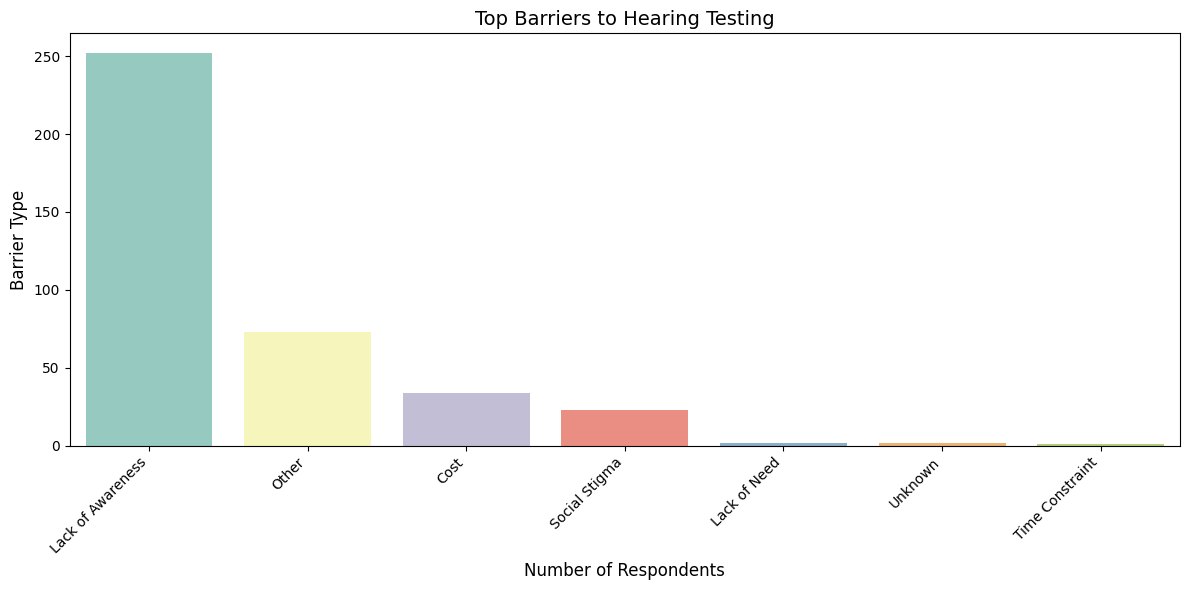

In [60]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


plt.figure(figsize=(12, 6))
sns.barplot(x=barrier_counts.index, y=barrier_counts.values, palette="Set3")
plt.title("Top Barriers to Hearing Testing", fontsize=14)
plt.xlabel("Number of Respondents", fontsize=12)
plt.ylabel("Barrier Type", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


<h4>This chart shows the features users most want to see in a hearing support app. Key observations include: Privacy is the most requested feature, highlighting how sensitive users are about their health data. Followed by features like Guidance and Reports, showing users want personal support and clear feedback about their hearing status. Gamification also appears, indicating that some users prefer a more engaging and interactive experience.
The ideal app should combine security, practical support, and engaging interaction.</h4>

C:\Users\hp\AppData\Local\Temp\ipykernel_13484\2123189158.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


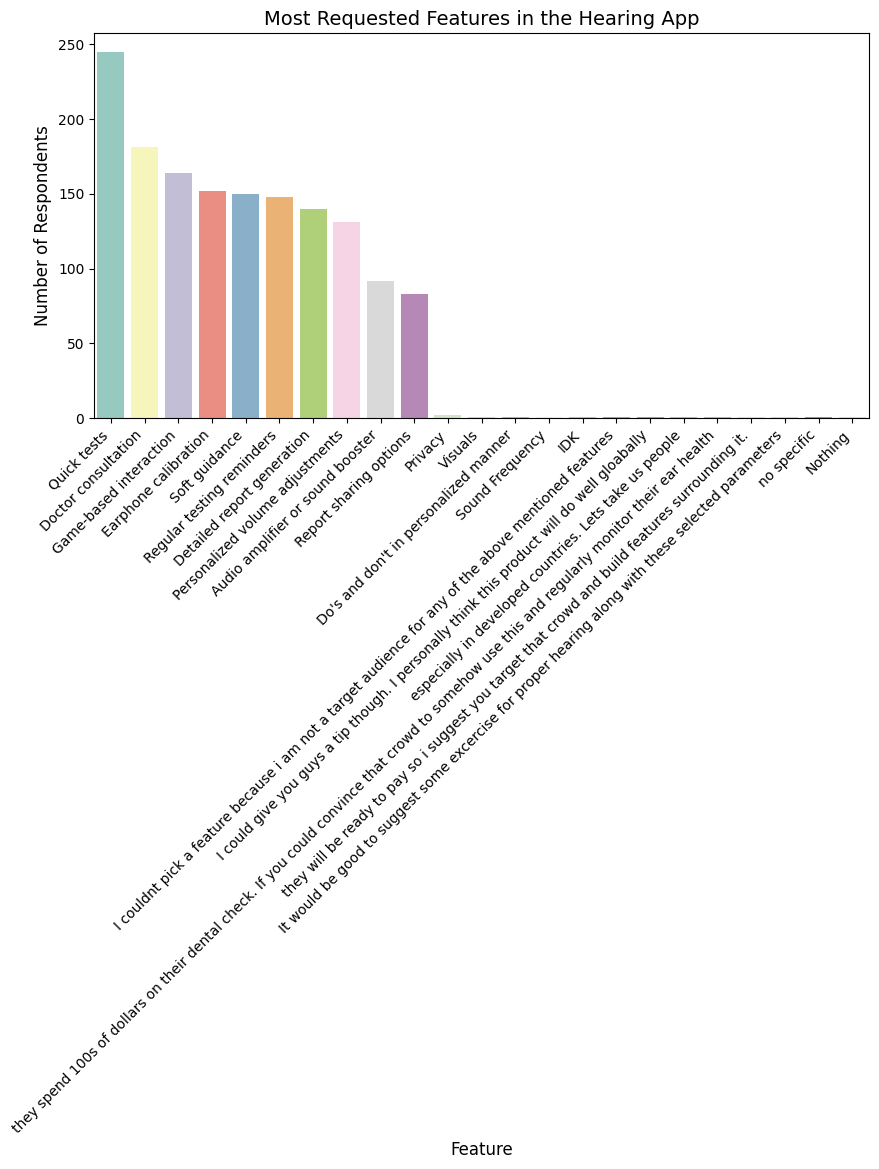

In [72]:

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_counts.index, y=feature_counts.values, palette="Set3")
plt.title("Most Requested Features in the Hearing App", fontsize=14)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Number of Respondents", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


<h4>This graph presents how interested people are in using a hearing support app. A majority of respondents showed positive interest, either saying "Yes" or "Maybe". This points to a strong market opportunity for developing an app that targets this audience. People are genuinely interested in digital solutions that help them understand and improve their hearing, especially if they’re easy to use and affordable.</h4>

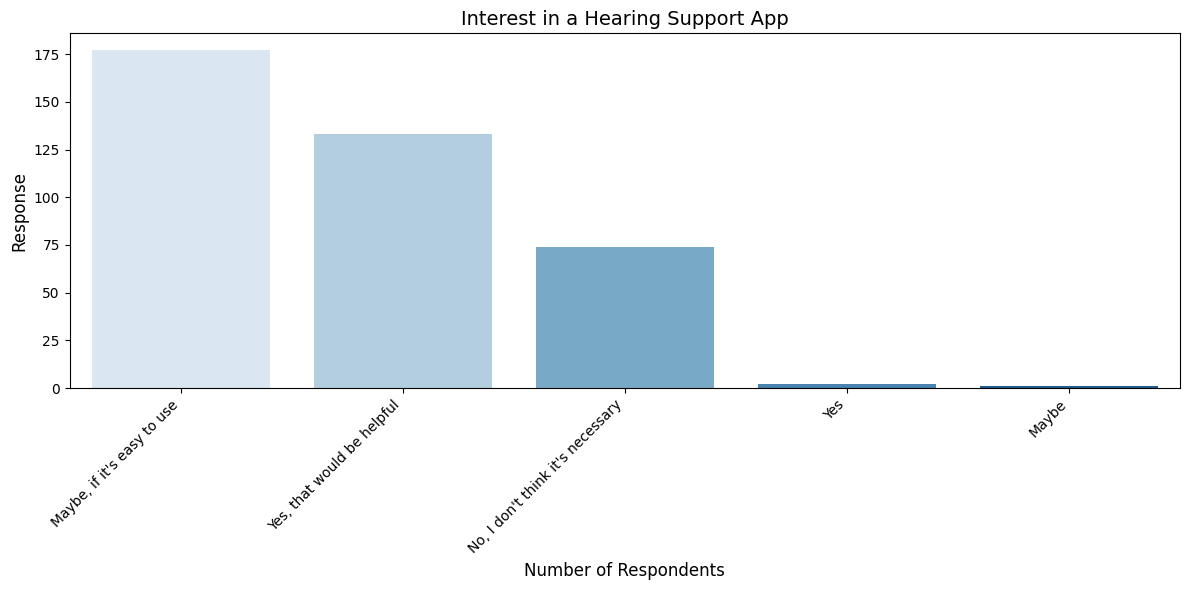

In [61]:
plt.figure(figsize=(12, 6))
sns.barplot(x=app_interest_counts.index, y=app_interest_counts.values, palette='Blues')
plt.title("Interest in a Hearing Support App", fontsize=14)
plt.xlabel("Number of Respondents", fontsize=12)
plt.ylabel("Response", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


<h4>This final chart explores whether users are willing to pay for the app. Most responses were either “Not sure” or “Yes, depending on the price”. Only a small group said “Definitely yes”, suggesting that users need to see clear value before they’re ready to pay.A flexible pricing strategy is essential. Consider offering a free version with basic features, and a premium upgrade with added value—like detailed reports or direct support.</h4>

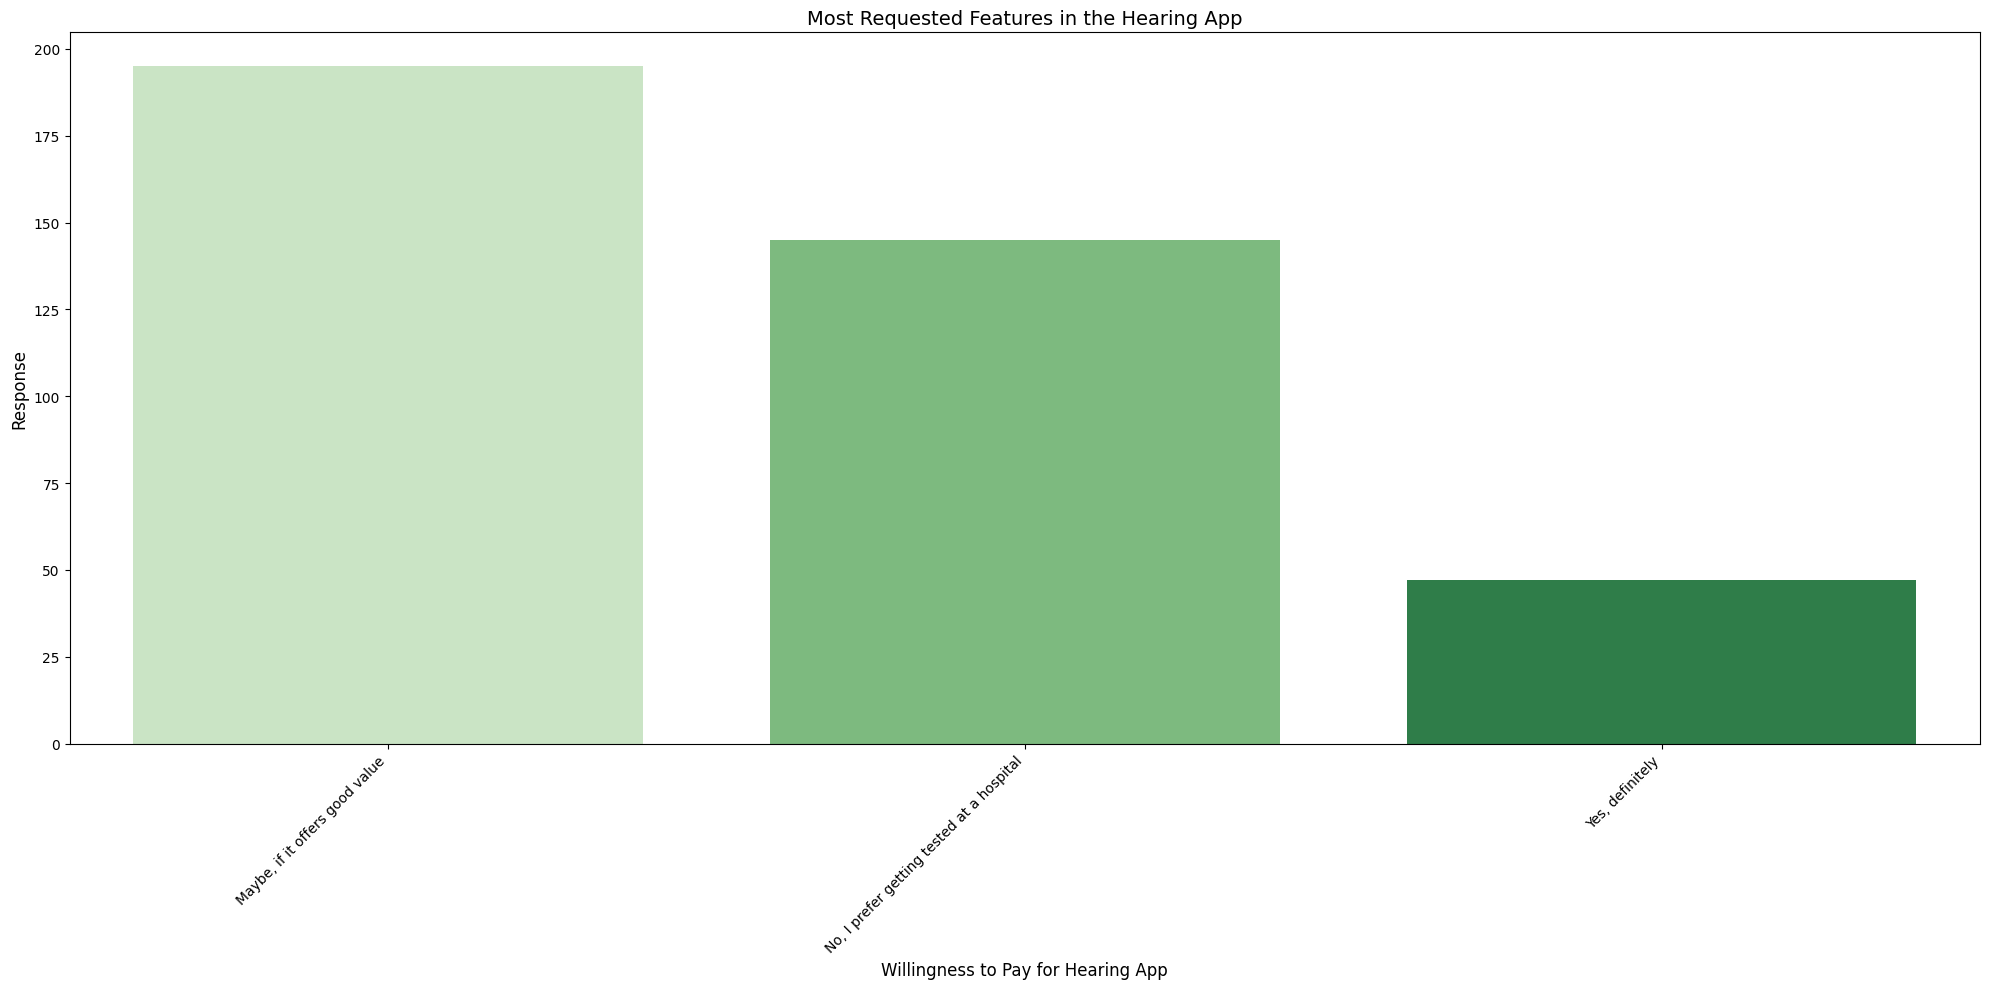

In [68]:
plt.figure(figsize=(20, 10))
sns.barplot(x=pay_interest_counts.index, y=pay_interest_counts.values, palette='Greens')

plt.title("Most Requested Features in the Hearing App", fontsize=14)
plt.xlabel("Willingness to Pay for Hearing App", fontsize=12)
plt.ylabel("Response", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


<h2>Conclusion</h2>

<h4>The data visualizations reveal a clear story about people’s attitudes toward hearing health and the potential role of supportive mobile applications:Users face real barriers to getting hearing tests — primarily cost, lack of awareness, and social stigma. These are emotional and practical challenges that can’t be ignored.
There is strong interest in an app that not only offers hearing assessments but also provides privacy, guidance, and an engaging experience.
Willingness to pay is conditional. While some are open to paying, most users want to understand the value they’ll receive before committing financially.

What this means:

There is a clear opportunity to build a human-centered, accessible, and value-driven hearing support app. Focusing on privacy, education, engagement, and affordability will be key to encouraging adoption and improving hearing care outcomes.</h4>